In [234]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.constants as const
pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:,.2f}'.format

In [235]:
df = pd.read_csv("Data.csv")
temp = df.columns
df.columns = ["C(мкФ)","R(Ом)","f(КГц)"]
df


,C(мФ),R(Ом),f(КГц)
0,1.00,10,16.00
1,1.00,15,11.00
2,1.00,25,7.00
3,1.00,50,3.60
4,1.00,75,2.30
5,1.00,100,1.60
6,1.00,150,1.00
7,1.00,200,0.83
8,2.20,10,7.60
9,2.20,15,5.10


In [236]:
df.columns = temp

In [237]:
df.C = df.apply(lambda row: row.C * 10**-6, axis=1)
df.f = df.apply(lambda row: row.f * 10**3, axis=1)

In [238]:
df['fTeor'] = 1 / (2 * const.pi * np.multiply(df.R, df.C))
df['X'] = np.divide(np.ones(len(df)), 2 * const.pi * np.multiply(df.f, df.C))
df['phi'] = -1 * np.arctan(np.divide(df.X, np.full((len(df)),50)))
df['df'] = np.abs(np.subtract(df.f, df.fTeor))
df['e'] = np.divide(df.df, df.fTeor) * 100

In [239]:
df.C = df.apply(lambda row: row.C * 10**6, axis=1)
df.f = df.apply(lambda row: row.f * 10**-3, axis=1)
df.fTeor = df.apply(lambda row: row.fTeor * 10**-3, axis=1)
df.df = df.apply(lambda row: row.df * 10**-3, axis=1)

In [272]:
dfirst = df[df.C == 1]
temp = df.columns
pretty_col_names = ["$C$(мкФ)","$R$(Ом)","$f$(КГц)","$f_{TEOR}$(КГц)","$X_C$(Ом)","$\phi$","$\Delta f$(КГц)","$\epsilon$"]
dfirst.columns = pretty_col_names
dfirst

,$C$(мкФ),$R$(Ом),$f$(КГц),$f_{TEOR}$(КГц),$X_C$(Ом),$\phi$,$\Delta f$(КГц),$\epsilon$
0,1.00,10,16.00,15.92,9.95,-0.20,0.08,0.53
1,1.00,15,11.00,10.61,14.47,-0.28,0.39,3.67
2,1.00,25,7.00,6.37,22.74,-0.43,0.63,9.96
3,1.00,50,3.60,3.18,44.21,-0.72,0.42,13.10
4,1.00,75,2.30,2.12,69.20,-0.95,0.18,8.38
5,1.00,100,1.60,1.59,99.47,-1.11,0.01,0.53
6,1.00,150,1.00,1.06,159.15,-1.27,0.06,5.75
7,1.00,200,0.83,0.80,191.75,-1.32,0.03,4.30


In [273]:
dfirst.columns = temp

In [274]:
dsecond = df[df.C == 2.2]
dsecond.columns = pretty_col_names
dsecond

,$C$(мкФ),$R$(Ом),$f$(КГц),$f_{TEOR}$(КГц),$X_C$(Ом),$\phi$,$\Delta f$(КГц),$\epsilon$
8,2.20,10,7.60,7.23,9.52,-0.19,0.37,5.05
9,2.20,15,5.10,4.82,14.18,-0.28,0.28,5.75
10,2.20,25,3.20,2.89,22.61,-0.42,0.31,10.58
11,2.20,50,1.54,1.45,46.98,-0.75,0.09,6.44
12,2.20,75,1.00,0.96,72.34,-0.97,0.04,3.67
13,2.20,100,0.80,0.72,90.43,-1.07,0.08,10.58
14,2.20,150,0.51,0.48,141.85,-1.23,0.03,5.75
15,2.20,200,0.39,0.36,185.50,-1.31,0.03,7.82


In [275]:
dsecond.columns = temp

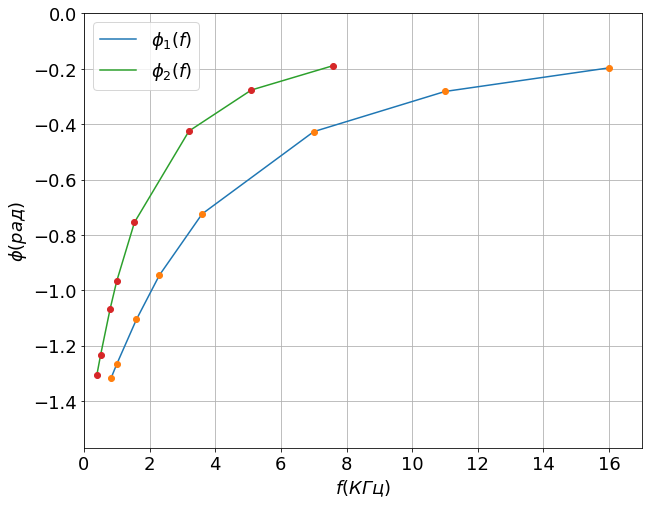

In [271]:
plt.figure(figsize = (10,8))
plt.ylabel(r"$\phi(рад)$")
plt.rc('font', size=18)
plt.xlabel(r"$f(КГц)$")
plt.grid();

#plt.axis('scaled')
plt.xlim(0, np.max(df.f) + 1)
plt.ylim(-const.pi / 2, 0)
#plt.yticks([-const.pi/2, -const.pi/3, -const.pi/4,  -const.pi/6, 0],["$\frac{pi}{2}$","$\frac{pi}{3}$","$\frac{pi}{4}$","$\frac{pi}{6}$","0"])

plt.plot(dfirst.f, dfirst.phi, '-', label = r"$\phi_1(f)$")
plt.plot(dfirst.f, dfirst.phi, 'o')
plt.plot(dsecond.f, dsecond.phi, '-', label = r"$\phi_2(f)$")
plt.plot(dsecond.f, dsecond.phi, 'o')
plt.legend(loc="best");

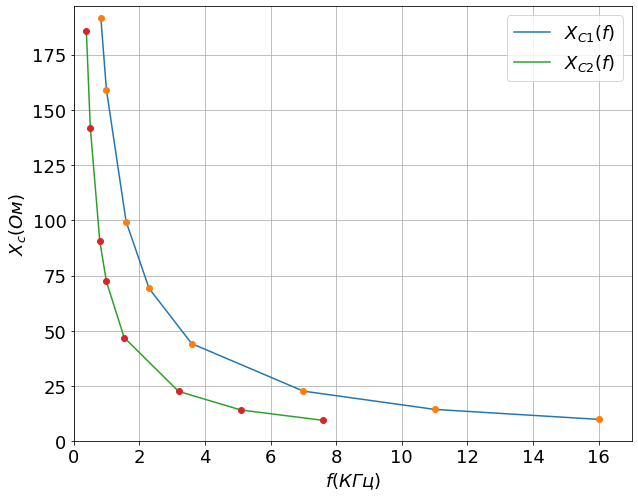

In [270]:
plt.figure(figsize = (10,8))
plt.ylabel(r"$X_c(Ом)$")
plt.rc('font', size=18)
plt.xlabel("$f(КГц)$")
plt.grid();

#plt.axis('scaled')
plt.xlim(0, np.max(df.f) + 1)
plt.ylim(0, np.max(df.X) + 5)
#plt.yticks([-const.pi/2, -const.pi/3, -const.pi/4,  -const.pi/6, 0],["$\frac{pi}{2}$","$\frac{pi}{3}$","$\frac{pi}{4}$","$\frac{pi}{6}$","0"])

plt.plot(dfirst.f, dfirst.X, '-', label = r"$X_{C1}(f)$")
plt.plot(dfirst.f, dfirst.X, 'o')
plt.plot(dsecond.f, dsecond.X, '-', label = r"$X_{C2}(f)$")
plt.plot(dsecond.f, dsecond.X, 'o')
plt.legend(loc="best");